In [19]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib
matplotlib.use('Agg')  # set Agg backend for matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [20]:
# Load the data
file_path = 'air_quality_health_dataset.csv'
try:
    df = pd.read_csv(file_path, encoding='ISO-8859-1', delimiter=',')
    print('Data loaded successfully.')
except Exception as e:
    print('Error loading data:', e)

# Display the first few rows as a sanity check
df.head()

Data loaded successfully.


,city,date,aqi,pm2_5,pm10,no2,o3,temperature,humidity,hospital_admissions,population_density,hospital_capacity
0,Los Angeles,2020-01-01,65,34.0,52.7,2.2,38.5,33.5,33,5,Rural,1337
1,Beijing,2020-01-02,137,33.7,31.5,36.7,27.5,-1.6,32,4,Urban,1545
2,London,2020-01-03,266,43.0,59.6,30.4,57.3,36.4,25,10,Suburban,1539
3,Mexico City,2020-01-04,293,33.7,37.9,12.3,42.7,-1.0,67,10,Urban,552
4,Delhi,2020-01-05,493,50.3,34.8,31.2,35.6,33.5,72,9,Suburban,1631


In [21]:
df['datetime'] = pd.to_datetime(df['date'], errors='coerce')

In [22]:
df.head()

,city,date,aqi,pm2_5,pm10,no2,o3,temperature,humidity,hospital_admissions,population_density,hospital_capacity,datetime
0,Los Angeles,2020-01-01,65,34.0,52.7,2.2,38.5,33.5,33,5,Rural,1337,2020-01-01
1,Beijing,2020-01-02,137,33.7,31.5,36.7,27.5,-1.6,32,4,Urban,1545,2020-01-02
2,London,2020-01-03,266,43.0,59.6,30.4,57.3,36.4,25,10,Suburban,1539,2020-01-03
3,Mexico City,2020-01-04,293,33.7,37.9,12.3,42.7,-1.0,67,10,Urban,552,2020-01-04
4,Delhi,2020-01-05,493,50.3,34.8,31.2,35.6,33.5,72,9,Suburban,1631,2020-01-05


In [23]:
# Check for missing values
missing_values = df.isnull().sum()
print('Missing values in each column:')
print(missing_values)

Missing values in each column:
city                   0
date                   0
aqi                    0
pm2_5                  0
pm10                   0
no2                    0
o3                     0
temperature            0
humidity               0
hospital_admissions    0
population_density     0
hospital_capacity      0
datetime               0
dtype: int64


In [24]:
# Convert population_density to a numeric value if possible; if not possible, leave it as is
try:
    df['population_density_numeric'] = pd.to_numeric(df['population_density'], errors='coerce')
    print('Converted population_density to numeric where possible.')
except Exception as e:
    print('Error converting population_density:', e)


Converted population_density to numeric where possible.


In [25]:
df.head()

,city,date,aqi,pm2_5,pm10,no2,o3,temperature,humidity,hospital_admissions,population_density,hospital_capacity,datetime,population_density_numeric
0,Los Angeles,2020-01-01,65,34.0,52.7,2.2,38.5,33.5,33,5,Rural,1337,2020-01-01,NaN
1,Beijing,2020-01-02,137,33.7,31.5,36.7,27.5,-1.6,32,4,Urban,1545,2020-01-02,NaN
2,London,2020-01-03,266,43.0,59.6,30.4,57.3,36.4,25,10,Suburban,1539,2020-01-03,NaN
3,Mexico City,2020-01-04,293,33.7,37.9,12.3,42.7,-1.0,67,10,Urban,552,2020-01-04,NaN
4,Delhi,2020-01-05,493,50.3,34.8,31.2,35.6,33.5,72,9,Suburban,1631,2020-01-05,NaN


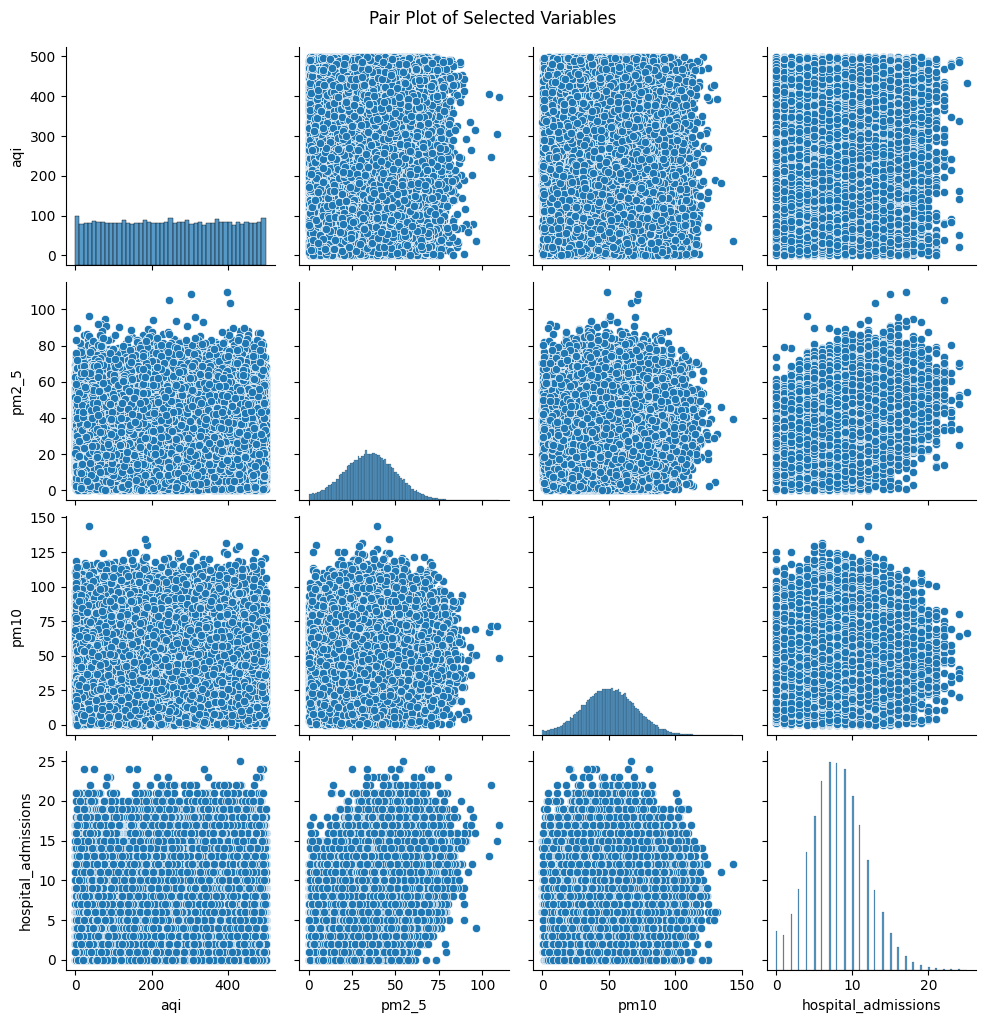

In [26]:
# Pair Plot of key variables
sns.pairplot(df[['aqi', 'pm2_5', 'pm10', 'hospital_admissions']])
plt.suptitle('Pair Plot of Selected Variables', y=1.02)
plt.savefig('pairplot.png')
plt.show()